# Imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import glob
import math
import time
import subprocess
import os
from IPython.display import clear_output
from matplotlib import cm
CMAP = cm.summer
from numpy import random
from scipy.interpolate import interp1d

from analysis import *
from sim_funcs import *
from consts import *

# Calculating Critical Mass

In [2]:
sims = np.sort(get_all_sim_dirs(data_folder = "data_1000_m6/"))
total_flux = np.zeros(80)
for sim in sims:
    v,flux,flux_er = get_cube_avg_flux(sim)
    total_flux += flux

mean_flux = total_flux/1000
data = np.array([v,mean_flux])
np.save("flux_data.npy",data)

Globbing from this dir: C:/Users/matth/Dropbox/github_repos/lunar_impacts/MEM3_Windows/data_1000_m6/


In [2]:
v,mean_flux = np.load("flux_data.npy")

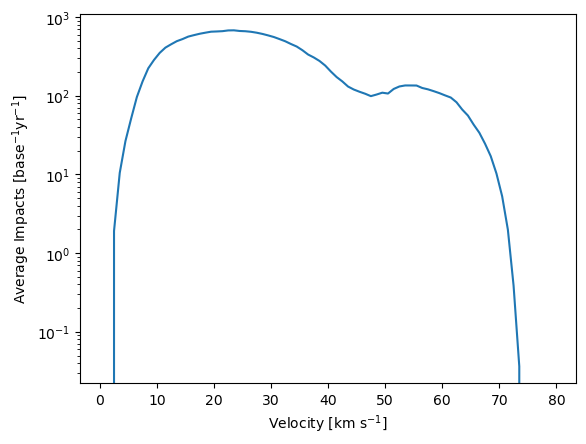

In [3]:
plt.plot(v,mean_flux)
plt.yscale("log")
plt.xlabel(r"Velocity [km s$^{-1}$]")
plt.ylabel(r"Average Impacts [base$^{-1}$yr$^{-1}$]")
plt.savefig("figures/vel_dist.pdf", bbox_inches="tight")

In [4]:
##DANIEL: ONLY RUNNING 1e7 samples because my laptop is wimpy, but paper quoted 1e9. Can change that in paper or run more here, idc
mfcdf = np.cumsum(mean_flux)
vel_cdf = (mfcdf-np.min(mfcdf))/(np.max(mfcdf)-np.min(mfcdf)) 
interp_vel = interp1d(vel_cdf, v)
N_samples = int(1.0e7)
x = random.rand(N_samples)
vel = interp_vel(x)

t_w = 0.48
rho_b = 2.851
sigma = 52
S = 11.43
F_2 = 1
rho_p = 8.9
theta = 0
num = t_w**2 * S * sigma/70
denom = np.power(rho_b,1.0/3.0)*np.power(vel*np.cos(theta),2.0)
m_c = (np.pi/6.0)*3.918**3*F_2**3 *num/denom

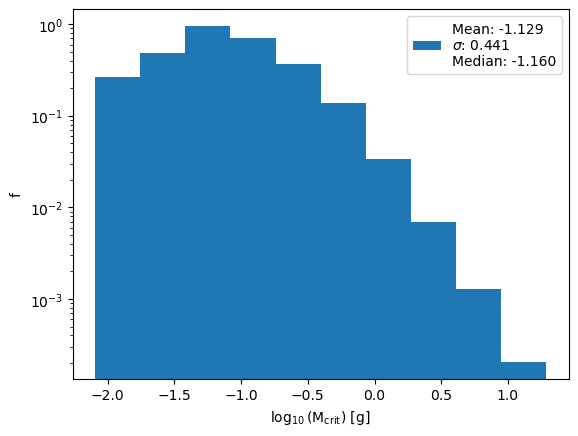

In [5]:
lmc = np.log10(m_c)
mean, std, med = '%.3f'%(np.mean(lmc)), '%.3f'%(np.std(lmc)), '%.3f'%(np.median(lmc))
label = "Mean: "+str(mean)+"\n"+r"$\sigma$: "+str(std)+"\nMedian: "+str(med)
plt.hist(lmc,label=label,log=True,density=True)

plt.xlabel(r"$\log_{10}($M$_{\rm crit}$) [g]")
plt.ylabel("f")
plt.legend()
plt.savefig("figures/m_crit.pdf", bbox_inches="tight")

In [10]:
thetas, phis, flux = read_flux_file("flux_rates_1000_m6.csv")
mean_flux = np.mean(flux)
m_grun = np.logspace(-6,1,100)
grun_flux = grun(m_grun)*BASE_SURF_AREA

scaling_factor = mean_flux/grun_flux[0]
flux = grun_flux*scaling_factor
mass_cdf =(flux-np.min(flux))/(np.max(flux)-np.min(flux))
interp_mass = interp1d(mass_cdf, m_grun)


In [11]:
y = random.rand(N_samples)
m_derived = interp_mass(y)
ratio = np.log10(m_derived/m_c)
fraction = np.size(np.where(ratio<0))/np.size(ratio)

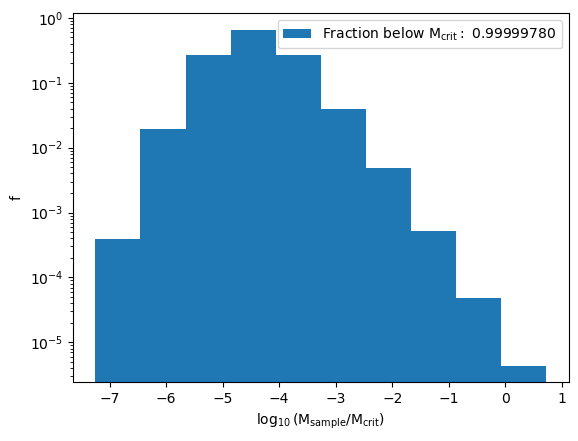

In [12]:
plt.hist(ratio, density=True, log=True,label=r"Fraction below M$_{\rm crit}:$ "+str('%.8f'%(fraction)))
plt.xlabel(r"$\log_{10}($M$_{\rm sample}$/M$_{\rm crit})$")
plt.ylabel("f")
plt.legend()
plt.savefig("figures/m_ratio.pdf", bbox_inches="tight")